### Movie Recommender System
In this project,basic recommendation system is developed by using python and pandas.This is a content based recommender system
which suggest the movies that are similar to a particular choice.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

### Import Data

In [21]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [22]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [11]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Now,merge the two data file

In [23]:
df1 = pd.merge(df,movie_titles,on='item_id')

In [24]:
df1.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


Exploratory Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

Create the data frame with average rating and number of ratings

In [26]:
df1.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [27]:
df1.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [28]:
ratings = pd.DataFrame(df1.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Set the number of ratings column

In [29]:
ratings['num of ratings'] = pd.DataFrame(df1.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Plotting histogram

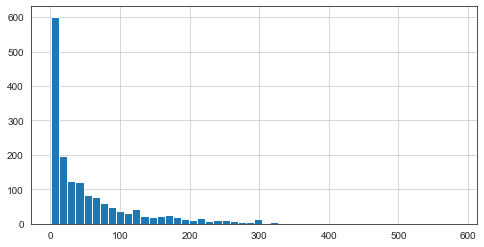

In [32]:
plt.figure(figsize=(8,4))
ratings['num of ratings'].hist(bins=50)

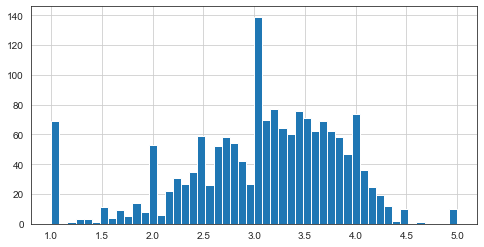

In [33]:
plt.figure(figsize=(8,4))
ratings['rating'].hist(bins=50)

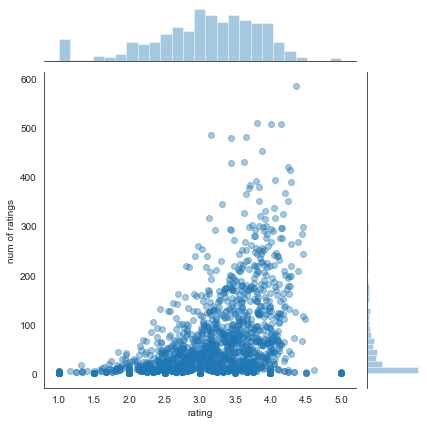

In [35]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.4)

Create the matrix which has user id and movie title on the axes.Each cell will then consist of the 
rating the user gave to that movie.
Note there will be a lot of NaN values because most people have not seen most of the movies.

In [37]:
moviemat = df1.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie

In [38]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Here,two movies have chosen one is Return of the Jedi(1983) sci-fi genre and another one is Toy Story(1995) anime one

Seek the user rating of these two movies

In [40]:
jedi_user_ratings = moviemat['Return of the Jedi (1983)']
toystory_user_ratings = moviemat['Toy Story (1995)']
jedi_user_ratings.head()

user_id
0    NaN
1    5.0
2    NaN
3    4.0
4    NaN
Name: Return of the Jedi (1983), dtype: float64

In [41]:
toystory_user_ratings.head()

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

Now correlate between these two pandas series

In [42]:
similar_to_jedi = moviemat.corrwith(jedi_user_ratings)
similar_to_toystory = moviemat.corrwith(toystory_user_ratings)

C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Remove the NaN values and use DataFrame instead of series

In [43]:
corr_jedi = pd.DataFrame(similar_to_jedi,columns=['Correlation'])
corr_jedi.dropna(inplace=True)
corr_jedi.head()

,Correlation
title,
'Til There Was You (1997),1.000000
1-900 (1994),-0.828079
101 Dalmatians (1996),0.165659
12 Angry Men (1957),-0.026169
187 (1997),0.064155


Now,sort the dataframe by correlations you will get the similar movies.There are some data which does not make any sense because there are lot of movies which are watched only once by users.

In [45]:
corr_jedi.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Stripes (1981),1.0
Guantanamera (1994),1.0
Manny & Lo (1996),1.0
"Quiet Room, The (1996)",1.0
Return of the Jedi (1983),1.0
A Chef in Love (1996),1.0
Cosi (1996),1.0
Mrs. Dalloway (1997),1.0
King of the Hill (1993),1.0


Filter out movies which have atleast 100 views

In [46]:
corr_jedi = corr_jedi.join(ratings['num of ratings'])
corr_jedi.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),1.000000,9
1-900 (1994),-0.828079,5
101 Dalmatians (1996),0.165659,109
12 Angry Men (1957),-0.026169,125
187 (1997),0.064155,41


In [47]:
corr_jedi[corr_jedi['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,368
Star Wars (1977),0.672556,584
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331


Same procedure will be followed for Toy Story(1995)

In [48]:
corr_toystory = pd.DataFrame(similar_to_toystory,columns=['Correlation'])
corr_toystory.dropna(inplace=True)
corr_toystory = corr_toystory.join(ratings['num of ratings'])
corr_toystory[corr_toystory['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
